In [123]:
import numpy as np
import matplotlib.pyplot as plt
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer
from os.path import isfile
from sortedcontainers import SortedSet

ModuleNotFoundError: No module named 'sortedcontainers'

# Tworzenie zbiorów odcinków

<h2>Funkcje do obsługi zbiorów odcinków</h2>

In [112]:
# Generates random set of line segments with unique x coordinates
def generateRandomLineSegments(amount, minX, maxX, minY, maxY):
    lineSegments = []
    usedXs = set()
    for _ in range(amount):
        x1 = np.random.uniform(minX, maxX)
        # Check if x1 is already used
        while x1 in usedXs:
            x1 = np.random.uniform(minX, maxX)
        usedXs.add(x1)
        x2 = np.random.uniform(minX, maxX)
        # Check if x2 is already used
        while x2 in usedXs:
            x2 = np.random.uniform(minX, maxX)
        usedXs.add(x2)
        # Sort line segment points by x coordinate
        if x2 < x1:
            x1, x2 = x2, x1
        lineSegments.append(((x1,np.random.uniform(minY,maxY)),(x2,np.random.uniform(minY,maxY))))
    return lineSegments

# Generate set of line segments with a mouse
def mouseGenerateLineSegments():
    # Setup plot
    lineSegments = []
    usedXs = set()
    firstPoint = None
    firstPointPlot = None
    plt.close("all")
    fig, ax = plt.subplots()
    baseTitle = "LMB - dodaj punkt (2 dodane punkty tworzą odcinek), RMB - zakończ"
    ax.set_title(baseTitle)
    connectionId = None

    # Add point to canvas
    def addPoint(point):
        return ax.scatter(point[0], point[1], color="blue")

    # Add lineSegment to canvas
    def addLineSegment(point1, point2):
        xs = [point1[0], point2[0]]
        ys = [point1[1], point2[1]]
        ax.plot(xs, ys, color="blue")
    
    # Mouse click event handler
    def onClick(event):
        ax.set_title(baseTitle)
        nonlocal firstPoint, firstPointPlot
        # LMB - add point
        if event.button == 1 and event.inaxes == ax:
            point = (event.xdata, event.ydata)
            if point[0] in usedXs:
                ax.set_title(baseTitle + "\nWspółrzędne x muszą być unikatowe")
                plt.draw()
                return
            usedXs.add(point[0])
            # Remember point if it's the first one of line segment
            if firstPoint is None:
                firstPoint = point
                firstPointPlot = addPoint(point)
                plt.draw()
            # Create line segment if it's the second point
            else:
                addPoint(point)
                addLineSegment(firstPoint, point)
                plt.draw()
                # Sort line segment points by x coordinate
                if point[0] < firstPoint[0]:
                    firstPoint, point = point, firstPoint
                lineSegments.append((firstPoint, point))
                firstPoint = None
        # RMB - end line segments creation
        elif event.button == 3:
            if len(lineSegments) < 2:
                ax.set_title(baseTitle + "\nDodaj co najmniej 2 odcinki")
                plt.draw()
                return
            # Remove alone point if exists
            if firstPoint is not None:
                firstPointPlot.remove()
            ax.set_title("Stworzono odcinki")
            plt.draw()
            # Sever the connection
            fig.canvas.mpl_disconnect(connectionId)

    # Connect plot to the event handler
    connectionId = fig.canvas.mpl_connect('button_press_event', onClick)
    plt.xlim(0, 3)
    plt.ylim(0, 3)
    plt.show()
    return lineSegments

# Save line segments set to file
# each file line contains a line segment - 4 coordinates (x1, y1, x2, y2) seperated with a space
def saveLineSegmentsToFile(lineSegments, path):
    file = open(path, "w")
    for ls in lineSegments:
        file.write(f"{ls[0][0]} {ls[0][1]} {ls[1][0]} {ls[1][1]}\n")
    file.close()

# Read line segments set from file
def readLineSegmentsFromFile(path):
    if not isfile(path):
        print(f"File {path} not found")
        return None
    file = open(path, "r")
    lineSegments = []
    for line in file:
        coords = [float(x) for x in line.split()]
        lineSegments.append(((coords[0], coords[1]), (coords[2], coords[3])))
    return lineSegments

# Draw line segments
def drawLineSegments(lineSegments):
    canvas = Visualizer()
    canvas.add_line_segment(lineSegments)
    canvas.show()

# Convert point to string
def pointToString(point, decimalPlaces=3):
    stringFormat = f"{{:.{decimalPlaces}f}}"
    return f"({stringFormat.format(point[0])},{stringFormat.format(point[1])})"

# Print line segments
def printLineSegments(lineSegments):
    n = len(lineSegments)
    print(f"Zbiór {n} odcinków:")
    for i, ls in enumerate(lineSegments):
        print(f"\t{i}: {pointToString(ls[0])} {pointToString(ls[1])}")

<h2>Generacja zbiorów odcinków</h2>

Zadanie zbioru odcinków za pomocą myszki:

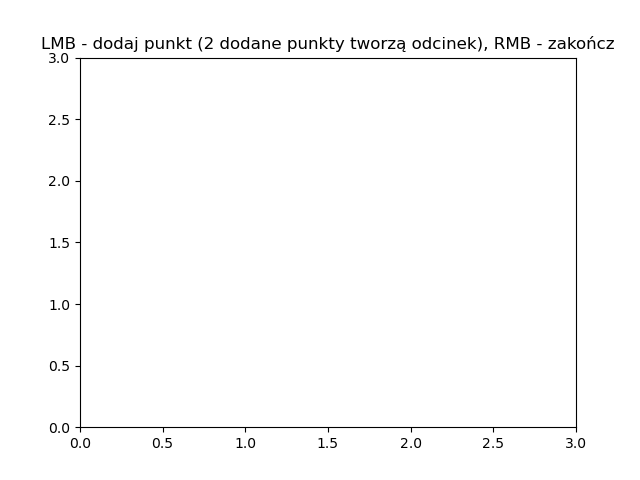

In [116]:
%matplotlib ipympl
mouseLineSegments = mouseGenerateLineSegments()

Generacja losowego zbioru odcinków:

In [117]:
randomLineSegments = generateRandomLineSegments(50, 0, 3, 0, 3)

<h2>Przedstawienie wygenerowanych zbiorów odcinków i zapis ich do pliku</h2>

Zbiór zadany myszką:

Zbiór 15 odcinków:
	0: (0.575,1.298) (1.149,0.397)
	1: (1.391,2.442) (2.208,1.785)
	2: (0.460,1.306) (1.228,0.965)
	3: (1.270,2.353) (2.111,1.525)
	4: (0.333,1.468) (1.893,1.314)
	5: (1.754,1.996) (1.978,2.442)
	6: (0.980,1.143) (1.954,1.151)
	7: (1.065,2.588) (2.492,2.174)
	8: (1.016,1.354) (2.038,0.470)
	9: (1.010,2.596) (2.292,1.817)
	10: (0.466,1.833) (0.865,0.608)
	11: (1.772,0.737) (2.153,1.452)
	12: (1.210,2.458) (2.014,2.353)
	13: (0.907,1.362) (1.306,0.737)
	14: (1.748,0.202) (2.504,0.478)


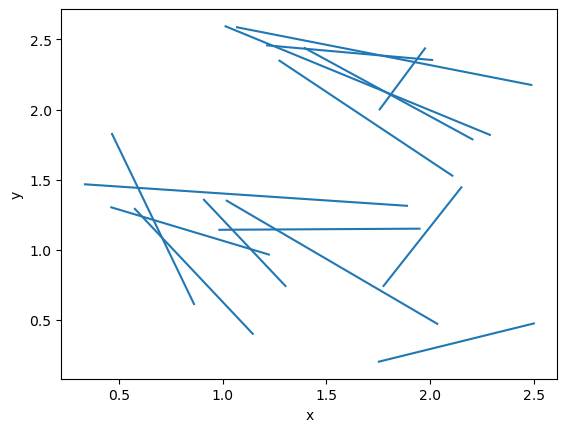

In [118]:
%matplotlib inline
saveLineSegmentsToFile(mouseLineSegments, "mouseLineSegments")
printLineSegments(mouseLineSegments)
drawLineSegments(mouseLineSegments)

Zbiór wygenerowany losowo:

Zbiór 50 odcinków:
	0: (1.892,0.557) (2.198,0.516)
	1: (0.080,2.754) (2.384,1.631)
	2: (0.051,0.949) (1.754,2.050)
	3: (1.834,0.591) (2.858,2.464)
	4: (0.099,0.809) (1.399,2.667)
	5: (0.827,0.521) (1.641,0.200)
	6: (0.223,1.019) (1.787,1.309)
	7: (1.280,2.948) (2.542,2.164)
	8: (0.757,2.327) (2.581,1.232)
	9: (1.462,0.718) (2.801,1.463)
	10: (1.319,2.480) (2.621,1.111)
	11: (2.424,1.360) (2.859,2.226)
	12: (0.975,1.649) (1.648,2.817)
	13: (0.404,1.706) (2.803,1.541)
	14: (1.131,1.608) (1.865,1.346)
	15: (0.669,1.748) (0.786,0.486)
	16: (1.508,0.281) (2.253,0.129)
	17: (0.478,2.851) (2.552,1.131)
	18: (1.996,1.394) (2.745,1.099)
	19: (0.141,2.869) (2.315,0.485)
	20: (1.975,2.652) (2.327,1.761)
	21: (0.253,2.254) (2.015,0.625)
	22: (0.015,2.213) (2.848,2.039)
	23: (1.373,1.396) (1.472,2.951)
	24: (2.090,1.986) (2.544,2.998)
	25: (2.497,1.074) (2.937,0.833)
	26: (1.092,0.415) (2.300,2.331)
	27: (1.998,0.407) (2.231,2.855)
	28: (0.872,2.278) (1.036,2.118)
	29: (0.814,2.063) (1.602,2.171)
	

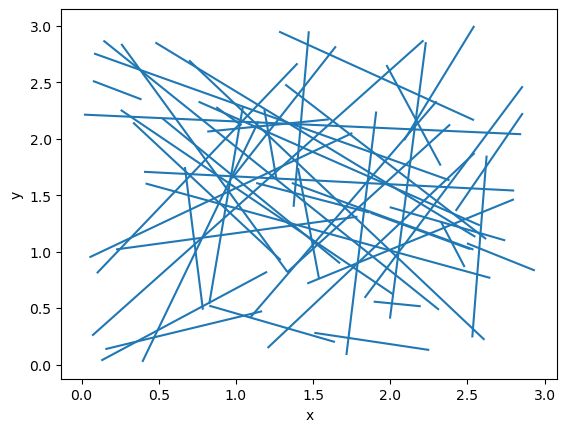

In [120]:
%matplotlib inline
saveLineSegmentsToFile(randomLineSegments, "randomLineSegments")
printLineSegments(randomLineSegments)
drawLineSegments(randomLineSegments)

# Sprawdzanie czy istnieje przecięcie w zbiorze odcinków

<h2>Funkcje sprawdzające istnienie przecięcia</h2>

In [ ]:
# Check if intersection exists in a set of line segments
def existsIntersection(lineSegments):
    

# Przydatne funkcje 

In [ ]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

In [ ]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

In [ ]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [ ]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    raise Exception("Unimplemented")

In [ ]:
Test().runtest(1, generate_uniform_sections)

<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [ ]:
# section = ...

Zwizualizuj otrzymane odcinki

In [ ]:
# visualize = ...

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką

In [ ]:
# def add_sections(sections):

Uzupełnij funkcję ```is_intersection```

In [ ]:
def is_intersection(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    raise Exception("Unimplemented")

In [ ]:
Test().runtest(2, is_intersection)

### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

In [ ]:
# Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [ ]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    raise Exception("Unimplemented")

Uzupełnij funkcję ```find_intersections```

In [ ]:
def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    raise Exception("Unimplemented")

In [ ]:
Test().runtest(3, find_intersections)

Uzupełnij funkcję ```find_intersections_with_visualization```

In [ ]:
def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

In [ ]:
# Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

In [ ]:
# Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [ ]:
# testing_sections = ???

In [ ]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

In [ ]:
# Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.